# *********Home Decor and Life style sector trends*********

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Loading the dataset

In [2]:
data = pd.read_csv('home_decor_data_200.csv')

In [3]:
data.head()

,Product Name,Brand,Category,Price,Rating,Review Count
0,Sofa Leather,Urban Ladder,Decor,4533,4.0,899
1,Sofa Glass,Ikea,Furniture,9290,3.3,1402
2,Wall Mirror Fabric,Home Town,Furniture,10371,3.8,311
3,Abstract Painting Leather,Ikea,Decor,12381,4.0,1013
4,Chesterfield Sofa Fabric,Urban Ladder,Decor,27335,4.5,1244


In [4]:
data.columns

Index(['Product Name', 'Brand', 'Category', 'Price', 'Rating', 'Review Count'], dtype='object')

In [5]:
data.dtypes

Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Review Count      int64
dtype: object

### Checking for null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  200 non-null    object 
 1   Brand         200 non-null    object 
 2   Category      200 non-null    object 
 3   Price         200 non-null    int64  
 4   Rating        200 non-null    float64
 5   Review Count  200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


##### There is no null value in our dataset

In [7]:
data.isnull().sum()

Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Review Count    0
dtype: int64

### Checking for duplicate values

In [8]:
data.duplicated().sum()

0

##### There is no duplicate record in our dataset

In [9]:
data.describe()

,Price,Rating,Review Count
count,200.000000,200.00000,200.000000
mean,14309.305000,4.01100,849.150000
std,8697.396182,0.56806,404.999457
min,1070.000000,3.00000,106.000000
25%,6761.250000,3.50000,478.500000
50%,12937.500000,4.00000,890.500000
75%,21978.750000,4.50000,1209.500000
max,29956.000000,5.00000,1493.000000


##### Observations : 
- Price: Ranges from 1070 to ~30000 , with an average price of 14309.
- Rating: Varies between 3 and 5, with an average of 4.01.
- Review Count : Average of 849.15 indicates that products receive a healthy number of reviews on average.

In [10]:
data.describe(include='object')

,Product Name,Brand,Category
count,200,200,200
unique,59,10,2
top,Recliner Chair Glass,Urban Ladder,Furniture
freq,8,25,105


##### Observations :
- **Product Name:** Most purchased item is Recliner Chair Glass (8 times) .
- **Brand:** "Urban Ladder" appears 25 times, suggesting it is a dominant player in the dataset.
- **Category:** Most common category is Furniture .  

In [11]:
popular_brands = data.groupby('Brand')['Review Count'].sum().sort_values(ascending=False)
print(popular_brands.head())

Brand
Urban Ladder      22604
Home Center       19341
Godrej Interio    19154
Brustro           18890
Home Town         18328
Name: Review Count, dtype: int64


##### Insight :
- Urban Ladder dominates the market with the highest customer engagement.
- Home Center and Godrej Interio are close competitors.

(array([19., 16.,  7.,  9.,  9., 12., 12., 10.,  9.,  9.,  5.,  8., 12.,
         7., 13.,  8.,  6., 12., 11.,  6.]),
 array([ 1070. ,  2514.3,  3958.6,  5402.9,  6847.2,  8291.5,  9735.8,
        11180.1, 12624.4, 14068.7, 15513. , 16957.3, 18401.6, 19845.9,
        21290.2, 22734.5, 24178.8, 25623.1, 27067.4, 28511.7, 29956. ]),
 <BarContainer object of 20 artists>)

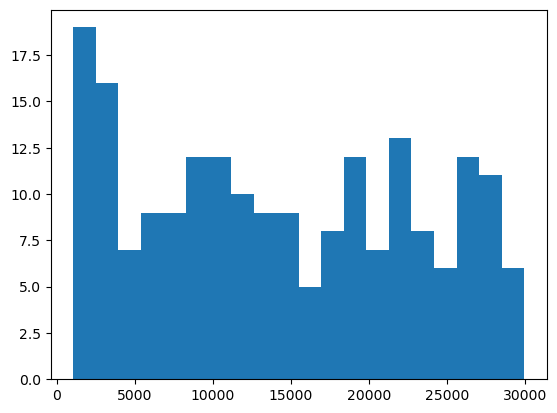

In [12]:
plt.hist(data['Price'],bins=20)

##### Insight :
Price ranges from 1070 to ~30000 , with an average price of 14309.

<Axes: xlabel='Brand'>

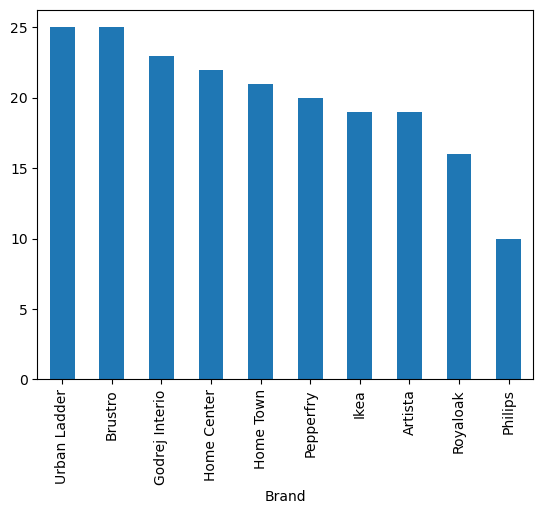

In [13]:
data['Brand'].value_counts().plot(kind='bar')

##### Insights : Majority are Urban Ladder and Brustro

<Axes: xlabel='Brand', ylabel='Price'>

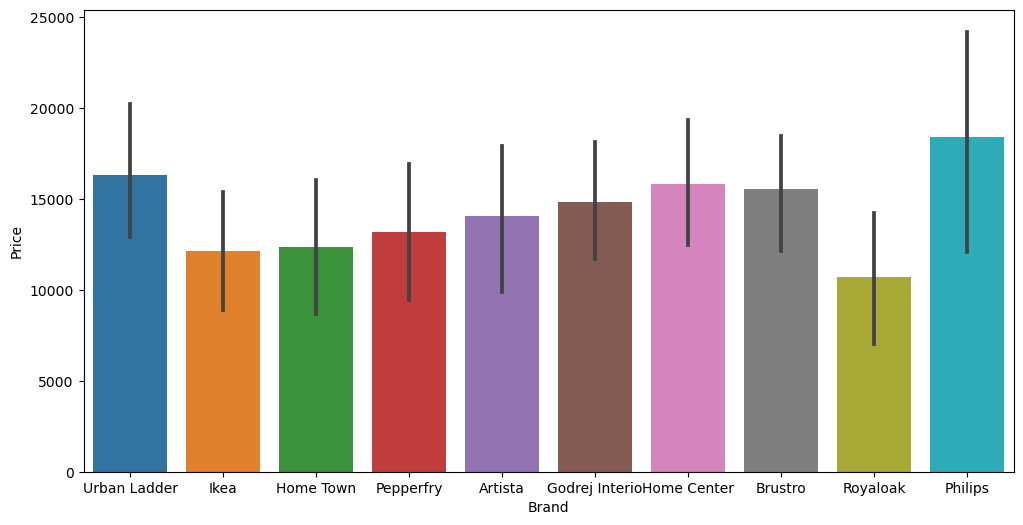

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data,x='Brand',y='Price')

##### Insight :
- Philips and Urban Ladder have the highest average prices.
- Their pricing suggests a premium product positioning, likely offering high-quality or luxury home decor items.
- Royaloak and Ikea offer the lowest average prices, making them attractive to budget-conscious customers.

In [15]:
fig = px.histogram(data , x = 'Brand' ,color = 'Category' )
fig.show()

##### Insights :
- Furniture-Dominant Brands: Pepperfry, Home Town, and Ikea cater more toward furniture buyers.
- Decor-Focused Brands: Brustro and Godrej Interio may attract customers looking for home accessories.
- Diversified Brands: Urban Ladder and Home Center appeal to a broad customer base by offering both categories equally.

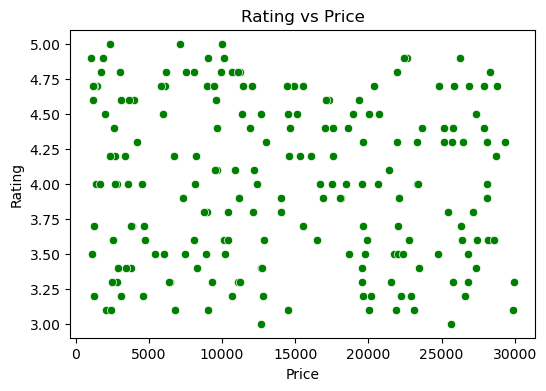

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price', y='Rating', data=data, color='green')
plt.title('Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

##### Insight :
- There is no significant correlation between rating and price 

In [17]:
data.groupby('Category')['Price'].sum()

Category
Decor        1345155
Furniture    1516706
Name: Price, dtype: int64

In [18]:
shop_group = data.groupby('Category')['Price'].sum().reset_index()
fig = px.bar(shop_group , x= 'Category',y = 'Price' )
fig.show()

##### Insight :
- The close pricing between furniture and decor suggests a market where decorative elements are nearly as valuable as furniture pieces
- This could indicate a luxury market where aesthetic value is highly prioritized

In [19]:
shop_group = data.groupby('Product Name')['Review Count'].sum().reset_index()
fig = px.bar(shop_group , x= 'Product Name',y = 'Review Count' )
fig.show()

##### Insight :
- One product (likely a Recliner) stands out with the highest number of reviews (~8500+), indicating its popularity.
- Sofas, tables, and wall clocks also have high review counts, suggesting strong customer engagement.

In [20]:
shop_group = data.groupby('Brand')['Rating'].sum().reset_index()
fig = px.bar(shop_group , x= 'Brand',y = 'Rating' )
fig.show()

##### Insights :
High rated brands are Brustro and Urban Ladder 

In [21]:
shop_group = data.groupby('Product Name')['Rating'].sum().reset_index()
fig = px.bar(shop_group , x= 'Product Name',y = 'Rating' )
fig.show()

##### Insight :
- Seating furniture (recliners and sofas) tends to rank highest in ratings
- Decorative items like wall clocks and mirrors fall in the middle range

## Actionable Recommendations:
- If certain brands have high ratings but low prices, you can recommend increasing prices for those brands.
- Use customer feedback to optimize product offerings.
- The majority of products are priced between ₹6,761 and ₹21,978. Consider targeting this range to attract more customers.
- Investigate why products priced above ₹22,000 still maintain strong ratings and reviews—these could indicate premium offerings.
- With a median rating of 4.0 and a mean rating of 4.01, customers are generally satisfied.
- Competitor Analysis: "Urban Ladder" is a leading competitor, as it has the highest representation in the dataset.
- Focus on the strategies of Urban Ladder, Home Center, and Godrej Interio, as they dominate in terms of customer interaction.
- Investigate their pricing, marketing, and customer satisfaction metrics.

Actionable Recommendations:

If certain brands have high ratings but low prices, you can recommend increasing prices for those brands.
Use customer feedback to optimize product offerings.

Recommendations for Analysis
Pricing Strategy:

The majority of products are priced between ₹6,761 and ₹21,978. Consider targeting this range to attract more customers.
Investigate why products priced above ₹22,000 still maintain strong ratings and reviews—these could indicate premium offerings.
Customer Preferences:

With a median rating of 4.0 and a mean rating of 4.01, customers are generally satisfied.

Insights and Recommendations for the Assignment
Competitor Analysis:

"Urban Ladder" is a leading competitor, as it has the highest representation in the dataset.
Focus on analyzing their product types, pricing strategies, and customer preferences.
Customer Preferences:

Since Furniture dominates the dataset, it is likely the main interest area for customers. Further analysis should examine price points, ratings, and reviews for this category.
Data Gaps:

The dataset has limited brand diversity. Consider enriching the data with additional brands to improve the breadth of market analysis.

Implications for Your Assignment
Competitor Analysis:

Focus on the strategies of Urban Ladder, Home Center, and Godrej Interio, as they dominate in terms of customer interaction.
Investigate their pricing, marketing, and customer satisfaction metrics.
Market Trends:

A higher review count often correlates with customer trust and popularity. These brands may set trends in the home decor and furniture sector.
Insights for Recommendations:

Emulate strategies like product diversification, quality improvements, and marketing campaigns seen in top brands.
Highlight the need for new brands to gain visibility and reviews to compete effectively.
